# Assignment 12

### Loading Packages

In [83]:
from bs4 import BeautifulSoup
import urllib
import csv
import requests
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

### Question 1 

1. Write Python code using the BeautifulSoup package to generate the csv output file:
    - a) Parse/Scrap the given URL and organize each book information on the webpage in following columns and save the organized information in csv file as an output. (30 points)
        - i. Title
        - ii. Author(s)
        - iii. Publisher
        - iv. Release Date
       

In [7]:
url = "https://repo.vse.gmu.edu/ait/AIT580/580books.html"

In [41]:
page = requests.get(url , verify = False)
page

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'repo.vse.gmu.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>

In [42]:
## Extracting Table 
soup = BeautifulSoup(page.text, 'html.parser')
table = soup.find('table')

In [67]:
## Function to extract rows
def extract_row(value):
    row = []
    for row_value in value.find_all('td'): 
        row.append(row_value.text.strip())
    return row

In [68]:
## Extract Columns
col = []
for tbl in table.tbody.find_all('tr'): 
    col.append(extract_row(tbl))

In [95]:
## Creating Pandas DataFrame
df = pd.DataFrame(col)
df.columns = df.iloc[0]
df = df.drop(0, axis= 0)
df.to_csv("ExtractedFile.csv" , index = False)

### Question 2

1. Read the output csv file from part 1 and write python code to answer the following question. You can use Pandas Package in python. (20 points)
    - a. Print the frequency count for publishers (that is, how many books for each publisher).
    - b. Visualize the output of (a) using a chart of your own choice.
    - c. Print the frequency count for year of publication.
    - d. Visualize the output of (b) using a chart of your own choice

In [97]:
data = pd.read_csv('ExtractedFile.csv')

In [106]:
# Print the frequency count for publishers (that is, how many books for each publisher).
PubFreq_df = pd.DataFrame(data.Publisher.value_counts())
PubFreq_df = PubFreq_df.reset_index()
PubFreq_df

,index,Publisher
0,O'Reilly Media,4
1,Packt Publishing,2
2,"Maker Media, Inc",1
3,Elsevier / Syngress,1
4,No Starch Press,1
5,Pragmatic Bookshelf,1


Text(0.5, 1.0, 'Bar Chart (Publisher)')

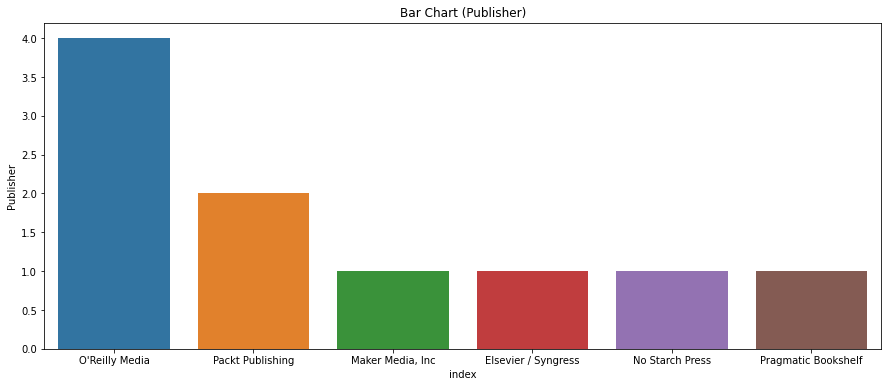

In [107]:
## Visualize the output of (a) using a chart of your own choice.
plt.figure(figsize = (15, 6))
sns.barplot(x = 'index' , y = 'Publisher' , data= PubFreq_df)
plt.title("Bar Chart (Publisher)")

In [100]:
# Print the frequency count for year of publication.

freq_df = pd.DataFrame(data.PubDate.value_counts())
freq_df = freq_df.reset_index()
freq_df

,index,PubDate
0,May 2017,2
1,December 2016,1
2,June 2013,1
3,September 2016,1
4,November 2017,1
5,April 2017,1
6,November 2016,1
7,August 2016,1
8,September 2017,1


Text(0.5, 1.0, 'Bar Chart (Publication Year)')

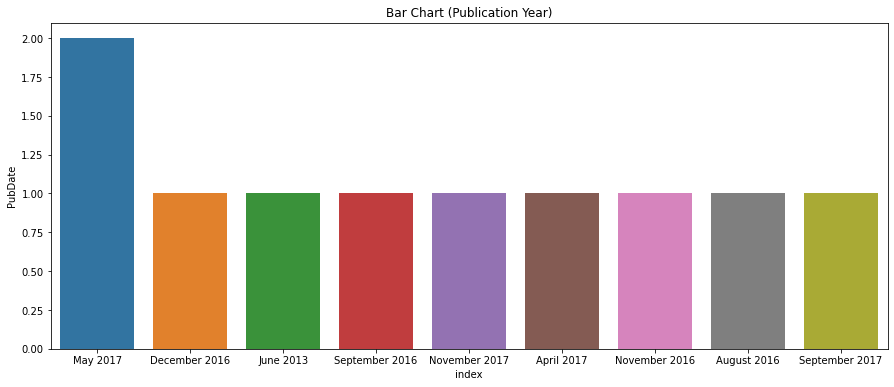

In [103]:
## Visualize the output of (a) using a chart of your own choice.
plt.figure(figsize = (15, 6))
sns.barplot(x = 'index' , y = 'PubDate' , data= freq_df)
plt.title("Bar Chart (Publication Year)")